# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [141]:
import math

def jarvismarch(inputSet):
        
        if len(inputSet) == 0:
                return

        def direction(p1: tuple, p2: tuple, p3: tuple) -> int:
                cross_product = (p2[0]-p1[0])*(p3[1]-p2[1]) - (p3[0]-p2[0])*(p2[1]-p1[1])
                if cross_product > 0:
                        return 1 # counter clockwise
                elif cross_product < 0:
                        return -1 # clockwise
                else: # cross_product == 0
                        return 0 # collinear

        leftmost = min(inputSet, key=lambda p: (p[1], p[0]))
        outputSet = []
        outputSet.append(leftmost)
        current = leftmost
        iterator = 0
        while True:
                end = inputSet[0]
                for point in inputSet:
                        if point == current:
                                continue
                        numDirection = direction(current, end, point)
                        if numDirection == -1:
                                end = point
                        elif numDirection == 0: 
                                if math.sqrt((point[0] - current[0])**2 + (point[1] - current[1])**2) > math.sqrt((end[0] - current[0])**2 + (end[1] - current[1])**2): #if the points are colinear, take the one further away from current
                                        end = point
                iterator += 1
                outputSet.append(end)
                current = end
                if end == outputSet[0]:
                        break

        return outputSet


  

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [142]:
def grahamscan(inputSet):
    '''
    Returns the list of points that lie on the convex hull (graham scan algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''

    #ADD YOUR CODE HERE

    if len(inputSet) == 0:
        return
    
    def calcPolarAngle(point: tuple, origin: tuple):
        x, y = point
        oX, oY = origin
        return math.atan2(y-oY, x-oX)

    def calcDist(point: tuple, origin: tuple):
        x, y = point
        oX, oY = origin
        return math.sqrt((y-oY)*(y-oY) + (x-oX)*(x-oX))

    def sortByAngle(points: [], origin: tuple):
        points.sort(key=lambda point: (calcPolarAngle(point, origin), point[0], -point[1]))

    def direction(p1: tuple, p2: tuple, p3: tuple) -> int:
        cross_product = ((p2[0]-p1[0])*(p3[1]-p2[1])) - ((p3[0]-p2[0])*(p2[1]-p1[1]))

        if cross_product > 0:
            return 1 # counter clockwise
        elif cross_product < 0:
            return -1 # clockwise
        else: # cross_product == 0
            return 0 # collinear

    # Solution begins here
    points = inputSet.copy()
    
    # Empty input
    if len(points) < 1:
        return []
    
    p0 = min(points, key=lambda p: (p[1], p[0])) # first point on hull (origin) 
    
    # Sort points
    sortByAngle(points, p0)
    
    outputSet = [] # resulting list to store points on convex hull
    for i in range(len(points) + 1):
        p = points[i] if i < len(points) else points[0]
        while (len(outputSet) >= 2 and                          # < 0: inlcude collinear points
               direction(outputSet[-2], outputSet[-1], p) <= 0): # <= 0: don't inlcude collinear points
            outputSet.pop()
        outputSet.append(p)
    
    #outputSet.append(p0)
    
    return outputSet

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [143]:
def chen(inputSet):
    '''
    Returns the list of points that lie on the convex hull (chen's algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
       
    m = 3 # The initial m value determines how many parts of the set of input points will be processed
    
    StartPoint = min(inputSet)
    def divide_points(m,inputSet): # Group the set of input points according to m, and apply Graham scanning algorithm to each group
        Points = []
        for i in range(len(inputSet)//m):
            Points.extend(grahamscan(inputSet[i*m:(i+1)*m]))
        return Points
            
    while m <=len(inputSet):
        Points = divide_points(m,inputSet)
        outputSet = jarvismarch(Points)  # Compute the convex hull of the current point set using the Jarvis step method
        if outputSet[-1] == StartPoint:    # If the last point of the convex hull is the starting point, the complete convex hull has been found, ending the loop
            return outputSet
        else:
            m = m*m     # If no complete convex hull is found, the value of m is increased to reduce the number of groups, and the value of m is squared by itself each time
    return outputSet
   


   

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [144]:
import matplotlib.pyplot as plt
import random

class TestDataGenerator():
    """
    A class to represent a synthetic data generator.
    """

    def __init__(self):
        pass
        
    def data_generation(self,n):
        inputSet = []
        for i in range (n):
            inputSet.append((random.randint(0,100),random.randint(0,100)))
        return inputSet
    
    def huge_convex_point(self,h):
        inputSet = []
        interval = 100/h
        y=0
        for i in range(h):
            inputSet.append((y,math.sqrt(-(y-50)**2+2500)+50))
            inputSet.append((y,-math.sqrt(-(y-50)**2+2500)+50))
            y = y + interval
        return inputSet

Use the cell below to implement the requested **experimental framework** API.

In [145]:
import timeit
import matplotlib

class ExperimentalFramework():
    """
    A class to represent an experimental framework.
    """
    def display_convex_hull(self, inputSet, outputSet):
        x = [point[0] for point in outputSet]
        y = [point[1] for point in outputSet]
        notx = [point[0] for point in inputSet]
        noty = [point[1] for point in inputSet]
        plt.plot(x, y, marker='o', linestyle='-', color='r')
        plt.scatter(notx, noty, marker='o', linestyle='-')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title('Plot of the Convex Points')
        plt.grid(True)
        plt.show()

    def display_times(self, jarvis_times, graham_times, chen_times):
        jarvis_x = [point[1] for point in jarvis_times]
        graham_x = [point[1] for point in graham_times]
        chen_x = [point[1] for point in chen_times]
        jarvis_y = [(point[0]) for point in jarvis_times]
        graham_y = [point[0] for point in graham_times]
        chen_y = [point[0] for point in chen_times]
        
        plt.plot(jarvis_x, jarvis_y, marker='o', linestyle='-', color='r',label='Jarvis')
        plt.plot(graham_x, graham_y, marker='o', linestyle='-', color='g',label='Graham')
        plt.plot(chen_x, chen_y, marker='o',linestyle='-',color='b',label='Chen')
        plt.legend()
        plt.xlabel('Data Set Size')
        plt.ylabel('Seconds')
        plt.title('Growth of the algorithms depending on size')
        plt.grid(True)
        plt.show()
        
            


    def __init__(self, n):
        #jarvis-march algorithm
        self.jarvis = TestDataGenerator()
        self.jarvis_inputSet = self.jarvis.data_generation(n)
        self.jarvis_time = timeit.timeit(lambda: jarvismarch(self.jarvis_inputSet), number=10) #repeat 10 times and take avg
        self.jarvis_outputSet = jarvismarch(self.jarvis_inputSet)
        #graham-scan algorithm
        self.graham = TestDataGenerator()
        self.graham_inputSet = self.jarvis_inputSet
        self.graham_time = timeit.timeit(lambda: grahamscan(self.graham_inputSet), number=10)
        self.graham_outputSet = grahamscan(self.graham_inputSet)
        

        
        #chen-algo algorithm
   
        self.chen = TestDataGenerator()
        self.chen_inputSet = self.jarvis_inputSet
        self.chen_time = timeit.timeit(lambda: chen(self.chen_inputSet), number=10)
        self.chen_outputSet = chen(self.chen_inputSet)
 

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

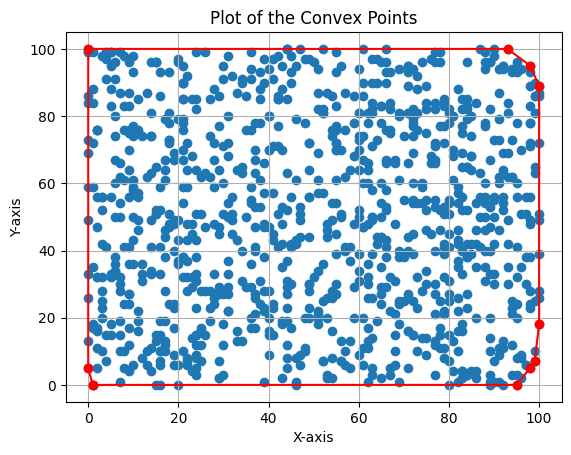

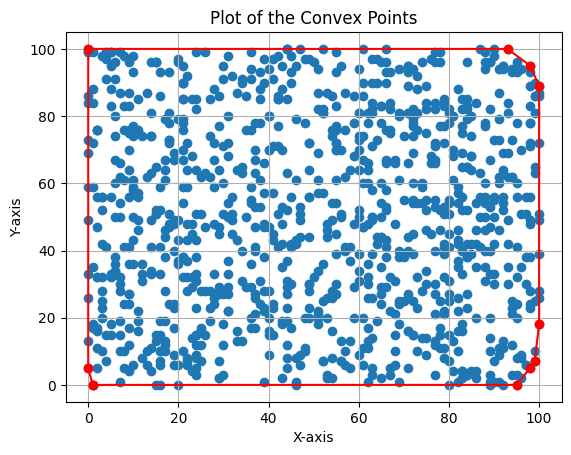

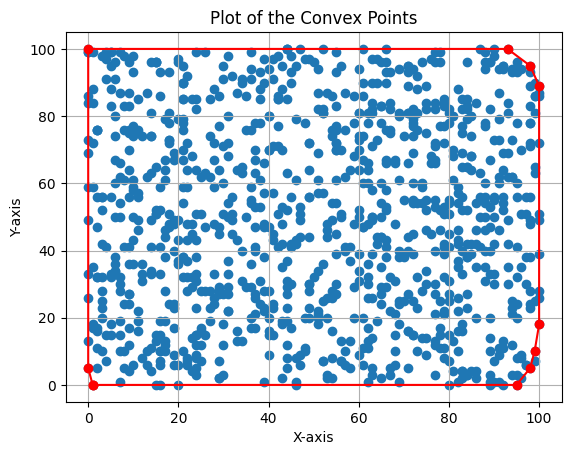

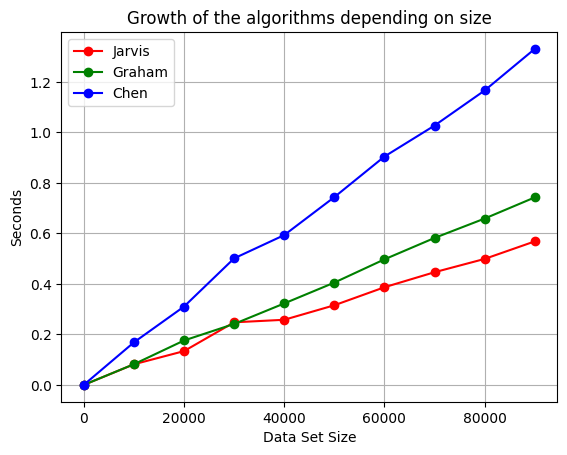

In [146]:
# ADD YOUR TEST CODE HERE 
framework = ExperimentalFramework(1000)
framework.display_convex_hull(framework.jarvis_inputSet, framework.jarvis_outputSet)
framework.display_convex_hull(framework.graham_inputSet, framework.graham_outputSet)
framework.display_convex_hull(framework.chen_inputSet, framework.chen_outputSet)

def testLargeNs():
    jarvis_results = []
    graham_results = []
    chen_results = []
    for i in range(10,100000, 10000):
        framework = ExperimentalFramework(i)
        jarvis_results.append((framework.jarvis_time, i))
        graham_results.append((framework.graham_time, i))
        chen_results.append((framework.chen_time,i))
    
    framework.display_times(jarvis_results, graham_results, chen_results)

def testNPoints(n):
    if n<1:
        return

    framework = ExperimentalFramework(n)
    framework.display_convex_hull(framework.jarvis_inputSet, framework.jarvis_outputSet)
    framework.display_convex_hull(framework.graham_inputSet, framework.graham_outputSet)


def testNgon(n):
    pass

def testNColinear(n):
    framework = ExperimentalFramework(3)
    inputSet = []
    m = random.randint(0,100)
    c = random.randint(-1000,1000)
    for i in range(n):
   
        x = random.randint(0,1000)
        y = m*x + c
        inputSet.append((x,y))

    framework.display_convex_hull(inputSet, jarvismarch(inputSet))
    framework.display_convex_hull(inputSet, grahamscan(inputSet))
    framework.display_convex_hull(inputSet, chen(inputSet))
    
        
        
testNColinear(4)

